In [26]:
# All Imports

import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline
from sklearn.model_selection import train_test_split


In [27]:
# Coincap aoi to get bitcoin data
endpoint = 'https://min-api.cryptocompare.com/data/v2/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=500&api_key=346a5653477eed39d369f3b05523c27a427a45ab31125be8a8dbf06cf4478d49')
hist = pd.DataFrame(json.loads(res.content)['Data']['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [28]:
# print first 5 
hist.head(5)

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2020-05-19,9890.69,9471.96,9722.73,60720.68,5.876600e+08,9780.20,direct,
2020-05-20,9832.94,9323.82,9780.20,61892.78,5.939187e+08,9509.45,direct,
2020-05-21,9566.81,8811.54,9509.45,87116.97,7.982188e+08,9059.11,direct,
2020-05-22,9265.04,8936.82,9059.11,44400.90,4.052557e+08,9170.74,direct,
2020-05-23,9311.34,9101.08,9170.74,23636.66,2.178195e+08,9186.19,direct,


In [29]:
# print last 5
hist.tail(5)

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2021-09-27,44360.41,42139.24,43201.79,26251.27,1.140232e+09,42187.51,direct,
2021-09-28,42781.24,40924.13,42187.51,31946.42,1.335757e+09,41056.79,direct,
2021-09-29,42603.18,40790.67,41056.79,26354.27,1.100253e+09,41539.43,direct,
2021-09-30,44106.60,41436.79,41539.43,33984.98,1.469982e+09,43829.34,direct,
2021-10-01,44049.00,43316.10,43829.34,3270.14,1.429175e+08,43419.33,direct,


In [38]:
# training 60%, validation 20%, testing 20%
def data_split(df, test_size=0.25, validation=0.2):
    
    remaining, validation = train_test_split(df, test_size=test_size, shuffle=False)
    train, test = train_test_split(remaining, test_size=test_size, shuffle=False) # 0.25 x 0.8 = 0.2
    return train, test, validation

In [39]:
train, test, validation = data_split(hist, test_size=0.2, validation=0.2)

In [45]:
def line_plot(line1, line2, line3, label1=None, label2=None, label3=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.plot(line3, label=label3, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)

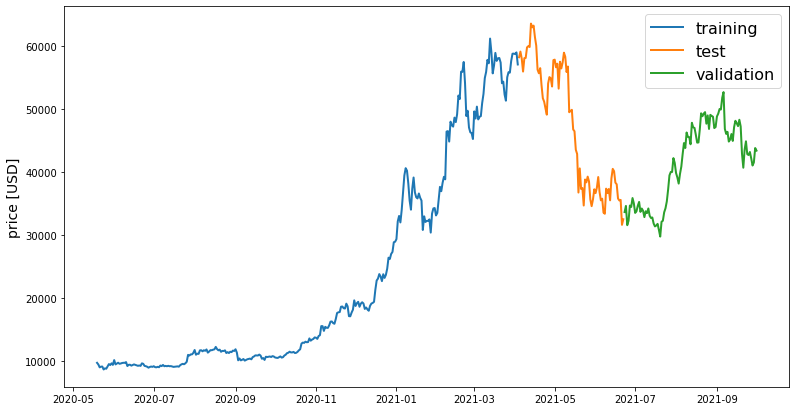

In [46]:
line_plot(train[target_col], test[target_col], validation[target_col], 'training', 'test', 'validation')